In [1]:
import matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import erf

**Defining Noise globally to avoid passing it separately to all functions**

In [2]:
rms_noise = 1.0

**Now defining all the functions that we need to compute the SNRs**

In [3]:
#The area under the f(x) within w samples from center is given by the erf
def area_under_w_samples(w, sigma, Tot_area):
    '''
    This function analytically computes the area under a gaussian
    eclosed by a box-car w samples wide
    '''
    return erf(w / (2. * 2**0.5 * sigma) ) * Tot_area


In [4]:
def trial_snr(w, sigma, Total_area):
    '''
    This function computes the SNR recovered by a box-car of 
    width w
    '''
    numerator = area_under_w_samples(w, sigma, Total_area)
    denominator = w**0.5 * rms_noise 
    trial_snr = numerator / denominator
    return trial_snr

In [5]:
def equal_height_snr(Total_area, sigma):
    '''
    This function computes the SNR of a tophat pulse with the
    same height and area as the height and area of a gaussian
    having area = Total_area and sigma = sigma (provided as args)
    '''
    height = Total_area / np.sqrt(2 * np.pi * sigma**2 )
    width = Total_area / height
    top_hat_snr = Total_area / width **0.5 / rms_noise
    return top_hat_snr

In [6]:
def equal_width_snr(Total_area, sigma):
    '''
    This function computes the SNR of a tophat pulse with the
    same width and area as the FWHM and area of a gaussian
    having area = Total_area and sigma = sigma (provided as args)
    '''
    fwhm = 2*sigma *np.sqrt(2*np.log(2))
    eq_w_snr = Total_area / fwhm**0.5 / rms_noise
    return eq_w_snr

In [7]:
def true_matched_filter_snr(Total_area, sigma):
    '''
    This function computes the match-filter SNR of a gaussian pulse
    assuming the template was exactly a replica of the pulse itself
    '''
    #The formula for computing matched-filter SNR reduces to just a
    # quadrature sum of the SNR of individual samples if the noise is
    # known to be white, uncorrelated and stationary
    return np.sqrt(Total_area**2 / (2 * np.pi**0.5 * sigma) ) / rms_noise

**Let us assume our signal to be the normal gaussian function which is completely defined by its area and sigma**
  i.e. f(x) = 1 / sqrt(2 pi sigma**2) * exp ( - x**2 / (2 sigma**2) ) 
  
**We will simulate multiple gaussians with the same Area but a range of different sigmas.**

### Now we begin our simulations

In [8]:
tsamp = 1 #seconds
rms_noise = 1.0

**Arbitrarily choosing max_sigma, min_sigma and sigma_spacing**

In [9]:
max_sigma = tsamp * 10
min_sigma = tsamp/100.
sigma_spacing = tsamp/50.

**Generating a list of all sigmas to simulate**

In [10]:
sigmas = np.arange(min_sigma, max_sigma, sigma_spacing)
Total_area = 1. #Held constant -- but can be varied manually to test

**Arbitrarily choosing No. of box-car trials**

In [11]:
N_bc_trials = 100

**Defining an array of all box-car trials. 
Smallest box-car is 1 sample wide, largest box-car is N_bc_trials samples wide;
i.e. each box-car trial is one sample wider than the previous**

In [12]:
bc_trials = np.arange(tsamp, N_bc_trials * tsamp, tsamp)

<IPython.core.display.Javascript object>


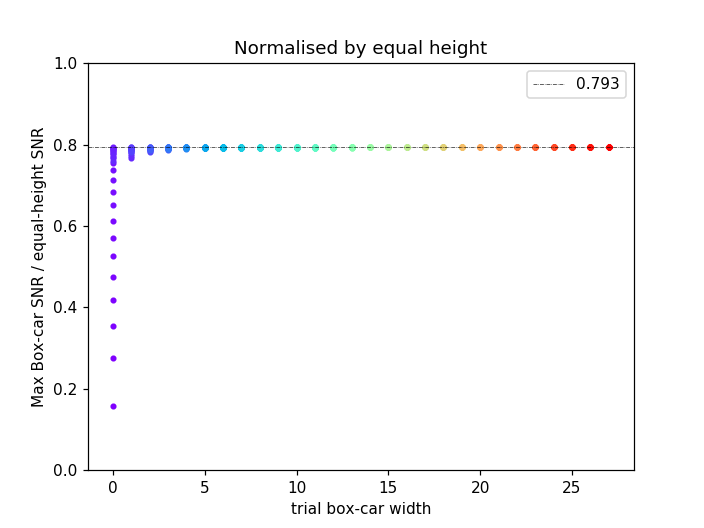

<IPython.core.display.Javascript object>


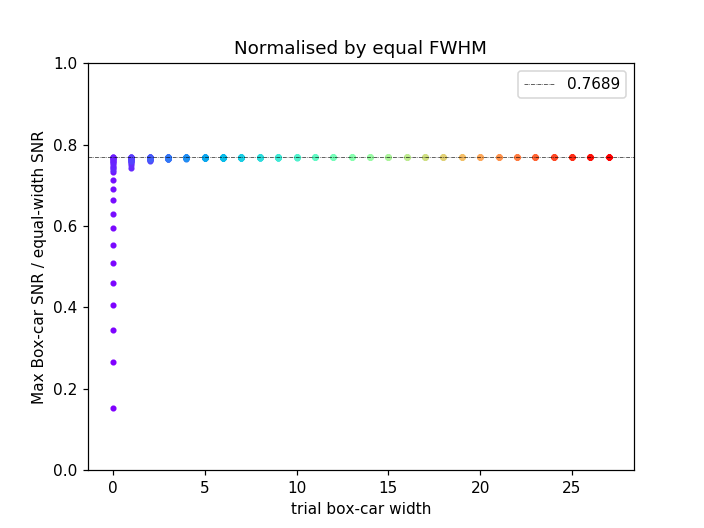

<IPython.core.display.Javascript object>


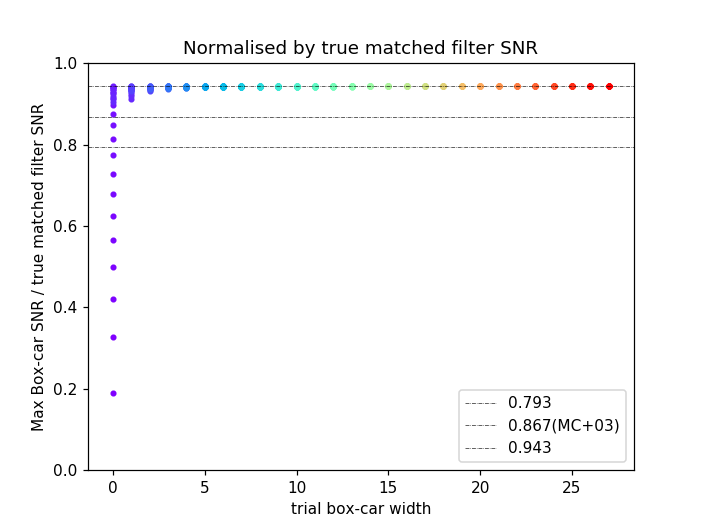

In [13]:
#--Create plot figures 
fig2 = plt.figure()
fig3 = plt.figure()
fig4 = plt.figure() 
  
ax2 = fig2.add_subplot(111)
ax3 = fig3.add_subplot(111)
ax4 = fig4.add_subplot(111)
#--

**These "norm_snr" variables contain the values of recovered SNR at different boxcar width trials. We need only the maximum values   We note down the location of the maximum -- i.e. the boxcar width which gave the maxima, along with the maxima value itself**

In [14]:
for sigma in sigmas:
    norm_snr1 = trial_snr(bc_trials, sigma=sigma, Total_area=Total_area)/equal_height_snr(Total_area=Total_area, sigma=sigma)
    norm_snr2 = trial_snr(bc_trials, sigma=sigma, Total_area=Total_area)/equal_width_snr(Total_area=Total_area, sigma=sigma)
    norm_snr3 = trial_snr(bc_trials, sigma=sigma, Total_area=Total_area)/true_matched_filter_snr(Total_area=Total_area, sigma=sigma)

    xx1 = np.argmax(norm_snr1)
    yy1 = norm_snr1[xx1]
  
    xx2 = np.argmax(norm_snr2)
    yy2 = norm_snr2[xx2]
  
    xx3 = np.argmax(norm_snr3)
    yy3 = norm_snr3[xx3]
  
    '''
    Simply plotting the maxima values recovered against the box-car width at
    which they were recorded. The color is chosen such that it indiates
    the sigma (width) of the simulated gaussian
    '''
    ax2.plot(xx1, yy1, '.', color=plt.cm.rainbow(sigma/max_sigma))
    ax3.plot(xx2, yy2, '.', color=plt.cm.rainbow(sigma/max_sigma))
    ax4.plot(xx3, yy3, '.', color=plt.cm.rainbow(sigma/max_sigma))

**These lines are just for reference and are not a part of any computations**

In [15]:
ax2.axhline(0.793345, ls='-.', c='k', lw = 0.4, label="0.793")
ax3.axhline(0.7689, ls='-.', c='k', lw = 0.4, label="0.7689")
ax4.axhline(0.793345, ls='-.', c='k', lw=0.4, label="0.793")
ax4.axhline(0.86757815, ls='-.', c='k', lw=0.4, label="0.867(MC+03)")
ax4.axhline(0.94345158, ls='-.', c='k', lw=0.4, label="0.943")

ax2.legend()
ax3.legend()
ax4.legend()
  
ax2.set_xlabel("trial box-car width")
ax2.set_ylabel("Max Box-car SNR / equal-height SNR")
 
ax3.set_ylabel("Max Box-car SNR / equal-width SNR")
ax3.set_xlabel("trial box-car width")
  
ax4.set_xlabel("trial box-car width")
ax4.set_ylabel("Max Box-car SNR / true matched filter SNR")
  
ax2.set_title("Normalised by equal height")
ax3.set_title("Normalised by equal FWHM")
ax4.set_title("Normalised by true matched filter SNR")
  
ax2.set_ylim(0, 1)
ax3.set_ylim(0, 1)
ax4.set_ylim(0, 1)

(0, 1)